In [3]:
import tensorflow as tf
import cv2
import numpy as np
import alexnet
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
NROFCLASSES = 2
X = tf.placeholder(tf.float32, shape=(None, 224, 224, 3), name="input")

In [6]:
# First we create a reference dictionary to make sure we can remap the output to images.
ref_dict = {}
for img_file in glob("Dataset/Test/*.*"):
    print(img_file)
    img_name = img_file.split('/')[-1]
    img = cv2.imread(img_file)
    img = cv2.resize(img, (224, 224))
    ref_dict[img_name] = img
images = np.asarray(list(ref_dict.values())) # we get the images as array since we need to feed that to network.

Dataset/Test/random.jpeg
Dataset/Test/illusion.jpg
Dataset/Test/illusion4.jpg
Dataset/Test/illusion5.png
Dataset/Test/random3.jpeg
Dataset/Test/illusion2.png
Dataset/Test/illusion3.jpg
Dataset/Test/hijab2.jpg
Dataset/Test/hijab.jpeg


In [7]:
# Recompile the model definition here
output = alexnet.alexnet_v2(X)
saver = tf.train.Saver()
with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        ckpt = tf.train.get_checkpoint_state("model")
        saver.restore(sess, "model/model-epoch500.ckpt") # reload the model from checkpoint.
        result = sess.run(output, feed_dict={X:images})
        result = tf.nn.softmax(result)
        inf_result = tf.argmax(result, 1)
        class_result = sess.run(result)
        out = sess.run(inf_result)
        for res in range(len(out)):
            if (out[res] == 0):
                print('It is NSFW!', list(ref_dict.keys())[res])
            else:
                print('It is SFW!', list(ref_dict.keys())[res])

INFO:tensorflow:Restoring parameters from model/model-epoch500.ckpt
It is NSFW! random.jpeg
It is NSFW! illusion.jpg
It is SFW! illusion4.jpg
It is SFW! illusion5.png
It is NSFW! random3.jpeg
It is NSFW! illusion2.png
It is NSFW! illusion3.jpg
It is SFW! hijab2.jpg
It is SFW! hijab.jpeg


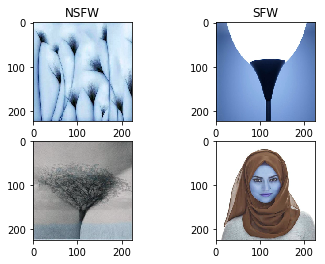

In [36]:
# We can visualize the images to see which are classified as NSFW and which are classified as SFW.
f, axarr = plt.subplots(2,2) 
axarr[0,0].imshow(ref_dict['illusion3.jpg'])
axarr[0,0].title.set_text('NSFW')
axarr[0,1].imshow(ref_dict['illusion4.jpg'])
axarr[0,1].title.set_text('SFW')
axarr[1,0].imshow(ref_dict['illusion2.png'])
axarr[1,1].imshow(ref_dict['hijab.jpeg'])

# Little Intuition

The reason behind such results is that since we had NSFW pictures resembling illusions classified as NSFW, therefore we get that result. However, note that none of these images were in the training set and/or validation set. For test set, I took pictures from Google separately. The picture of a lamp classified as SFW tells us that we probably didn't have training data similar to that corresponding to NSFW and SFW class. My data was limited to pictures shared on subreddits. Future work would be to explore a variety of images and then retrain the network. Currently, I only scrapped 500 images for each class. 